<a href="https://colab.research.google.com/github/jfcoderx/Data-Sciense/blob/main/cut_groupby_cleaning_randlist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### cut(), qcut() yordamida guruhlash

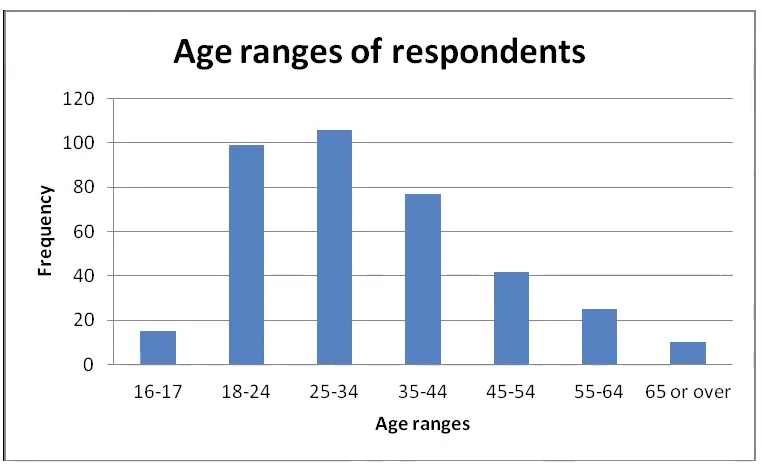

Sizda yosh haqida malumotlar bor, foydalanuvchilarni turli yoshlar boyicha turli guruxlarga ajratasiz, 16-17, 18-24, 25-34, 35-44, 45-54, 55-64, 65 or over

Xuddi shunday qilib malumotlarni guruxlarga ajratishni koramiz:


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/world_population.csv', usecols=['country', 'pop2021', 'area'], index_col='country')
df

,pop2021,area
country,,
Macau,658.394,30
Monaco,39.511,2
Singapore,5896.686,710
Hong Kong,7552.810,1104
Gibraltar,33.698,6
...,...,...
Namibia,2587.344,825615
Western Sahara,611.875,266000
Mongolia,3329.289,1564110


Davlarni aholisini soni boyicha guruxlarga ajratib koraylik:

Uzbekistan aholisini koradigan bolsak:

In [4]:
df.loc['Uzbekistan']

pop2021     33935.763
area       447400.000
Name: Uzbekistan, dtype: float64

33 mln ekan

In [5]:
df.loc['India']

pop2021    1393409.038
area       3287590.000
Name: India, dtype: float64

1mlr dan ziyodroq ekan

Demak quyidagi guruxlarga ajratib koramiz:<br>
Yani quyidagi oraliqda nechtadan davlatlar bor koramiz:

- 1 mlngacha (0-1000)
- 1-10 mlngacha (1000-10000)
- 10-30 mlngacha (10000-30000)
- 30-50 mlngacha (30000-50000)
- 50-100 mlngacha (50000-100000)
- 100-300 mlngacha (100000-300000)
- 300mln-1.5mlrdgacha (300000-1500000)

Va bular uchun BIN nuqtalarini yaratib olamiz

In [6]:
bins = [0, 1000, 10000, 50000, 100000, 300000, 1500000]

Bular yuqoridagi qiymatlarni korsatuvchi nuqtalar hisoblanadi

Endi aholilarni bir ozgaruvchiga saqlab olaylik:

In [7]:
population = df['pop2021']
population

country
Macau                658.394
Monaco                39.511
Singapore           5896.686
Hong Kong           7552.810
Gibraltar             33.698
                      ...   
Namibia             2587.344
Western Sahara       611.875
Mongolia            3329.289
Falkland Islands       3.533
Greenland             56.877
Name: pop2021, Length: 232, dtype: float64

Endi bu aholini guruxlarga tushuramiz

In [8]:
# population qiymatlarini bins qiymatlariga guruhlagin, bolgin, ajratgin degani

group = pd.cut(population, bins)
group

country
Macau                   (0, 1000]
Monaco                  (0, 1000]
Singapore           (1000, 10000]
Hong Kong           (1000, 10000]
Gibraltar               (0, 1000]
                        ...      
Namibia             (1000, 10000]
Western Sahara          (0, 1000]
Mongolia            (1000, 10000]
Falkland Islands        (0, 1000]
Greenland               (0, 1000]
Name: pop2021, Length: 232, dtype: category
Categories (6, interval[int64, right]): [(0, 1000] < (1000, 10000] < (10000, 50000] <
                                         (50000, 100000] < (100000, 300000] < (300000, 1500000]]

Guruxga ajraldi, qaysi davlat qaysi guruxga tushushi korsatildi
shuningdek, guruxlar soni 6 tadan iborat ekan

Biz har bir guruxda nechtadan davlat borligini ham korishimiz mumkin

In [9]:
group.value_counts()

(0, 1000]            72
(1000, 10000]        68
(10000, 50000]       63
(50000, 100000]      15
(100000, 300000]     11
(300000, 1500000]     3
Name: pop2021, dtype: int64

Demak 0-1000 oraliqdagi davlatlar soni 72 ta ekan vhk

Bunaqa tahlik juda asqotadi, misol siz millionlab malumot yigdiz lekin tahlil qilsangiz qaysidir guruxga oid malumotlarni juda kop yigvoribsiz qolgan turdagi malumotlar esa kam bolib qolibdi

Buni df ga ham qoshib qoysak boladi:

In [10]:
df['group'] = group
df

,pop2021,area,group
country,,,
Macau,658.394,30,"(0, 1000]"
Monaco,39.511,2,"(0, 1000]"
Singapore,5896.686,710,"(1000, 10000]"
Hong Kong,7552.810,1104,"(1000, 10000]"
Gibraltar,33.698,6,"(0, 1000]"
...,...,...,...
Namibia,2587.344,825615,"(1000, 10000]"
Western Sahara,611.875,266000,"(0, 1000]"
Mongolia,3329.289,1564110,"(1000, 10000]"


Yangi df bilan ham guruxlashni koraylik:

In [11]:
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/raw/main/automobile_data.csv', index_col=0)
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0


Bu df ni narxi boyicha guruxlarga ajrataylik:<br>
Bu uchun bu narxlarning qiymatlarini bilishimiz kerak (min, max vhk)<br>
bunda `DESCRIBE()` metodidan foydalanamiz:

In [12]:
df.price.describe()

count       58.000000
mean     15387.000000
std      11320.259841
min       5151.000000
25%       6808.500000
50%      11095.000000
75%      18120.500000
max      45400.000000
Name: price, dtype: float64

Korinib turibdiki<br>
demak eng arzon mashina 5151 dollar ekan<br>
eng qimmati 45400 ekan

Biz shular asosida binslarni yozvosak boladi

In [13]:
bins = [0, 10000, 20000, 30000, 40000, 50000]

In [14]:
group_price = pd.cut(df.price, bins)

In [15]:
group_price

index
0     (10000, 20000]
1     (10000, 20000]
2     (10000, 20000]
3     (10000, 20000]
4     (10000, 20000]
           ...      
81        (0, 10000]
82        (0, 10000]
86        (0, 10000]
87    (10000, 20000]
88    (10000, 20000]
Name: price, Length: 61, dtype: category
Categories (5, interval[int64, right]): [(0, 10000] < (10000, 20000] < (20000, 30000] <
                                         (30000, 40000] < (40000, 50000]]

In [16]:
group_price.value_counts()

(0, 10000]        28
(10000, 20000]    17
(30000, 40000]     7
(20000, 30000]     3
(40000, 50000]     3
Name: price, dtype: int64

Bu oraliqlar raqamlarda ifodalanayapti<br>
biz ularga nom berishimiz mumkin:

In [17]:
range_name = ["eng_arzon", "arzon", "o'rta", "qimmat", "eng_qimmat"]
group_price = pd.cut(df.price, bins, labels=range_name)
group_price

index
0         arzon
1         arzon
2         arzon
3         arzon
4         arzon
        ...    
81    eng_arzon
82    eng_arzon
86    eng_arzon
87        arzon
88        arzon
Name: price, Length: 61, dtype: category
Categories (5, object): ['eng_arzon' < 'arzon' < 'o'rta' < 'qimmat' < 'eng_qimmat']

In [18]:
group_price.value_counts()

eng_arzon     28
arzon         17
qimmat         7
o'rta          3
eng_qimmat     3
Name: price, dtype: int64

In [19]:
df['price_range'] = group_price
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,price_range
index,,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0,arzon
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0,arzon
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0,arzon
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0,arzon
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0,arzon
...,...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0,eng_arzon
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0,eng_arzon
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0,eng_arzon


Yuqorida bins lar oraligini ozimiz yozib chiqyapmiz:
aslida bu uncha togri emas, 
<br>oraliqlarga bolishni ham dasturga yuklashimiz mumkin

In [20]:
# bins orniga nechta oraliqqa ajratishni korsatamiz
# misol 5 ta oraliqqa ajrat deymiz

range = pd.cut(df.price, 5)
range.value_counts()

(5110.751, 13200.8]    32
(13200.8, 21250.6]     14
(29300.4, 37350.2]      7
(37350.2, 45400.0]      3
(21250.6, 29300.4]      2
Name: price, dtype: int64

Bunda ozi oraliqlarga ajratib oldi

Endi biz oraliqlar orasi teng taqsimlangan bolsin deyishimiz mumkin:

In [21]:
range = pd.qcut(df.price, 5)
range.value_counts()

(5150.999, 6604.6]    12
(7959.6, 13589.2]     12
(23719.2, 45400.0]    12
(6604.6, 7959.6]      11
(13589.2, 23719.2]    11
Name: price, dtype: int64

Bunda korinib turibdiki kategoriyalar sonini teng taqsimladi

<br>

### groupby() yordamida guruhlash
kuchli metodlardan biri

In [22]:
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/raw/main/automobile_data.csv', index_col=0)
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0


df da qanday kompaniyalar borligini koraylik:

In [23]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [24]:
df.company.value_counts()

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
isuzu            3
jaguar           3
porsche          3
dodge            2
volvo            2
Name: company, dtype: int64

Misol toyota mashinlari uchun ortacha narx yoki ortacha qiymatni kormoqchi <br>bolsak, avvalgi yozganlarimizdek yozsak, uzun bolib ketishi mumkin

`df[df.company = 'toyota'].mean()`

Yanayam osonroq usuli groupby() orqali:

In [25]:
# bu degani df ni company boyicha guruxlagin va ortacha qiymatlarini hisobla

df.groupby('company').mean()

,wheel-base,length,horsepower,average-mileage,price
company,,,,,
alfa-romero,90.566667,169.600000,125.333333,20.333333,15498.333333
audi,101.200000,180.800000,109.250000,20.000000,16392.500000
bmw,103.433333,185.033333,144.833333,19.000000,27213.333333
chevrolet,92.466667,151.933333,62.666667,41.000000,6007.000000
dodge,93.700000,157.300000,68.000000,31.000000,6303.000000
honda,96.500000,167.200000,92.333333,26.333333,10195.000000
isuzu,94.433333,160.833333,72.666667,33.333333,6785.000000
jaguar,109.333333,196.966667,204.666667,14.333333,34600.000000
mazda,95.900000,164.260000,75.400000,28.000000,9654.800000


In [26]:
# companydagi guruxlar va ularning maxsimum qiymatlari boyicha

df.groupby('company').max()

,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,,,,,,,,
alfa-romero,hatchback,94.5,171.2,ohcv,six,154,21,16500.0
audi,wagon,105.8,192.7,ohc,four,115,24,18920.0
bmw,sedan,110.0,197.0,ohc,six,182,23,41315.0
chevrolet,sedan,94.5,158.8,ohc,three,70,47,6575.0
dodge,hatchback,93.7,157.3,ohc,four,68,31,6377.0
honda,wagon,96.5,175.4,ohc,four,101,30,12945.0
isuzu,sedan,94.5,170.7,ohc,four,78,38,6785.0
jaguar,sedan,113.0,199.6,ohcv,twelve,262,15,36000.0
mazda,sedan,104.9,175.0,rotor,two,101,31,18344.0


Bular hamma qatorlar boyicha

biz aniq bir ustun boyicha hisoblab ber deyishimiz mumkin:

In [27]:
df.groupby('company').price.max()

company
alfa-romero      16500.0
audi             18920.0
bmw              41315.0
chevrolet         6575.0
dodge             6377.0
honda            12945.0
isuzu             6785.0
jaguar           36000.0
mazda            18344.0
mercedes-benz    45400.0
mitsubishi        8189.0
nissan           13499.0
porsche          37028.0
toyota           15750.0
volkswagen        9995.0
volvo            13415.0
Name: price, dtype: float64

Biz faqat bitta parameter boyicha emas, balki <br>
bir nechta parametrlar boyicha guruxlashimiz mumkin:

In [28]:
df.groupby(['company', 'body-style']).price.mean()

company        body-style 
alfa-romero    convertible    14997.500000
               hatchback      16500.000000
audi           sedan          15550.000000
               wagon          18920.000000
bmw            sedan          27213.333333
chevrolet      hatchback       5723.000000
               sedan           6575.000000
dodge          hatchback       6303.000000
honda          sedan          11645.000000
               wagon           7295.000000
isuzu          sedan           6785.000000
jaguar         sedan          34600.000000
mazda          hatchback       7482.500000
               sedan          18344.000000
mercedes-benz  hardtop        45400.000000
               sedan          33256.000000
               wagon          28248.000000
mitsubishi     hatchback       5789.000000
               sedan           7589.000000
nissan         sedan           8524.000000
               wagon           7349.000000
porsche        convertible    37028.000000
               hardtop     

In [29]:
df.groupby(['company', 'body-style', 'engine-type']).price.mean()

company        body-style   engine-type
alfa-romero    convertible  dohc           14997.500000
               hatchback    ohcv           16500.000000
audi           sedan        ohc            15550.000000
               wagon        ohc            18920.000000
bmw            sedan        ohc            27213.333333
chevrolet      hatchback    l               5151.000000
                            ohc             6295.000000
               sedan        ohc             6575.000000
dodge          hatchback    ohc             6303.000000
honda          sedan        ohc            11645.000000
               wagon        ohc             7295.000000
isuzu          sedan        ohc             6785.000000
jaguar         sedan        dohc           33900.000000
                            ohcv           36000.000000
mazda          hatchback    ohc             6028.333333
                            rotor          11845.000000
               sedan        ohc            18344.000000
mercedes

In [30]:
df.groupby(['company', 'body-style']).mean()

wheel-base      length  horsepower  \
company       body-style                                        
alfa-romero   convertible   88.600000  168.800000  111.000000   
              hatchback     94.500000  171.200000  154.000000   
audi          sedan         99.666667  176.833333  109.000000   
              wagon        105.800000  192.700000  110.000000   
bmw           sedan        103.433333  185.033333  144.833333   
chevrolet     hatchback     91.450000  148.500000   59.000000   
              sedan         94.500000  158.800000   70.000000   
dodge         hatchback     93.700000  157.300000   68.000000   
honda         sedan         96.500000  172.250000  100.500000   
              wagon         96.500000  157.100000   76.000000   
isuzu         sedan         94.433333  160.833333   72.666667   
jaguar        sedan        109.333333  196.966667  204.666667   
mazda         hatchback     93.650000  161.575000   76.250000   
              sedan        104.900000  175.000000   72.000000   
mercedes-benz hardtop      112.000000  199.200000  184.000000   
              sedan        115.450000  199.500000  153.500000   
              wagon        110.000000  190.900000  123.000000   
mitsubishi    hatchback     93.700000  157.300000   68.000000   
              sedan         96.300000  172.400000   88.000000   
nissan        sedan         95.975000  170.125000   86.250000   
              wagon         94.500000  170.200000   69.000000   
porsche       convertible   89.500000  168.900000  207.000000   
              hardtop       89.500000  168.900000  207.000000   
              hatchback     98.400000  175.700000  288.000000   
toyota        hatchback     95.700000  158.700000   62.000000   
              wagon         97.900000  174.225000   85.500000   
volkswagen    sedan         97.300000  171.700000   72.250000   
volvo         sedan        104.300000  188.800000  114.000000   
              wagon        104.300000  188.800000  114.000000   

                           average-mileage         price  
company       body-style                                  
alfa-romero   convertible        21.000000  14997.500000  
              hatchback          19.000000  16500.000000  
audi          sedan              20.333333  15550.000000  
              wagon              19.000000  18920.000000  
bmw           sedan              19.000000  27213.333333  
chevrolet     hatchback          42.500000   5723.000000  
              sedan              38.000000   6575.000000  
dodge         hatchback          31.000000   6303.000000  
honda         sedan              24.500000  11645.000000  
              wagon              30.000000   7295.000000  
isuzu         sedan              33.333333   6785.000000  
jaguar        sedan              14.333333  34600.000000  
mazda         hatchback          27.250000   7482.500000  
              sedan              31.000000  18344.000000  
mercedes-benz hardtop            14.000000  45400.000000  
              sedan              18.000000  33256.000000  
              wagon              22.000000  28248.000000  
mitsubishi    hatchback          34.000000   5789.000000  
              sedan              25.000000   7589.000000  
nissan        sedan              31.500000   8524.000000  
              wagon              31.000000   7349.000000  
porsche       convertible        17.000000  37028.000000  
              hardtop            17.000000  34028.000000  
              hatchback          17.000000           NaN  
toyota        hatchback          32.333333   6058.000000  
              wagon              26.000000   9836.000000  
volkswagen    sedan              31.750000   8435.000000  
volvo         sedan              23.000000  12940.000000  
              wagon              23.000000  13415.000000

In [31]:
df.groupby(['company', 'body-style', 'engine-type']).mean()

wheel-base      length  horsepower  \
company       body-style  engine-type                                       
alfa-romero   convertible dohc          88.600000  168.800000  111.000000   
              hatchback   ohcv          94.500000  171.200000  154.000000   
audi          sedan       ohc           99.666667  176.833333  109.000000   
              wagon       ohc          105.800000  192.700000  110.000000   
bmw           sedan       ohc          103.433333  185.033333  144.833333   
chevrolet     hatchback   l             88.400000  141.100000   48.000000   
                          ohc           94.500000  155.900000   70.000000   
              sedan       ohc           94.500000  158.800000   70.000000   
dodge         hatchback   ohc           93.700000  157.300000   68.000000   
honda         sedan       ohc           96.500000  172.250000  100.500000   
              wagon       ohc           96.500000  157.100000   76.000000   
isuzu         sedan       ohc           94.433333  160.833333   72.666667   
jaguar        sedan       dohc         113.000000  199.600000  176.000000   
                          ohcv         102.000000  191.700000  262.000000   
mazda         hatchback   ohc           93.100000  159.100000   68.000000   
                          rotor         95.300000  169.000000  101.000000   
              sedan       ohc          104.900000  175.000000   72.000000   
mercedes-benz hardtop     ohcv         112.000000  199.200000  184.000000   
              sedan       ohc          110.000000  190.900000  123.000000   
                          ohcv         120.900000  208.100000  184.000000   
              wagon       ohc          110.000000  190.900000  123.000000   
mitsubishi    hatchback   ohc           93.700000  157.300000   68.000000   
              sedan       ohc           96.300000  172.400000   88.000000   
nissan        sedan       ohc           94.500000  165.300000   64.333333   
                          ohcv         100.400000  184.600000  152.000000   
              wagon       ohc           94.500000  170.200000   69.000000   
porsche       convertible ohcf          89.500000  168.900000  207.000000   
              hardtop     ohcf          89.500000  168.900000  207.000000   
              hatchback   dohcv         98.400000  175.700000  288.000000   
toyota        hatchback   ohc           95.700000  158.700000   62.000000   
              wagon       dohc         104.500000  187.800000  156.000000   
                          ohc           95.700000  169.700000   62.000000   
volkswagen    sedan       ohc           97.300000  171.700000   72.250000   
volvo         sedan       ohc          104.300000  188.800000  114.000000   
              wagon       ohc          104.300000  188.800000  114.000000   

                                       average-mileage         price  
company       body-style  engine-type                                 
alfa-romero   convertible dohc               21.000000  14997.500000  
              hatchback   ohcv               19.000000  16500.000000  
audi          sedan       ohc                20.333333  15550.000000  
              wagon       ohc                19.000000  18920.000000  
bmw           sedan       ohc                19.000000  27213.333333  
chevrolet     hatchback   l                  47.000000   5151.000000  
                          ohc                38.000000   6295.000000  
              sedan       ohc                38.000000   6575.000000  
dodge         hatchback   ohc                31.000000   6303.000000  
honda         sedan       ohc                24.500000  11645.000000  
              wagon       ohc                30.000000   7295.000000  
isuzu         sedan       ohc                33.333333   6785.000000  
jaguar        sedan       dohc               15.000000  33900.000000  
                          ohcv               13.000000  36000.000000  
mazda         hatchback   ohc                30.66666

Yuqorida company boyicha guruhladik va birgina funksiya asosida

Bir nech funksiyani birga ishlatib ham qollash mumkin:

In [32]:
df.groupby('company').agg([min, max, np.mean])

wheel-base                    length                     \
                     min    max        mean    min    max        mean   
company                                                                 
alfa-romero         88.6   94.5   90.566667  168.8  171.2  169.600000   
audi                99.4  105.8  101.200000  176.6  192.7  180.800000   
bmw                101.2  110.0  103.433333  176.8  197.0  185.033333   
chevrolet           88.4   94.5   92.466667  141.1  158.8  151.933333   
dodge               93.7   93.7   93.700000  157.3  157.3  157.300000   
honda               96.5   96.5   96.500000  157.1  175.4  167.200000   
isuzu               94.3   94.5   94.433333  155.9  170.7  160.833333   
jaguar             102.0  113.0  109.333333  191.7  199.6  196.966667   
mazda               93.1  104.9   95.900000  159.1  175.0  164.260000   
mercedes-benz      110.0  120.9  113.225000  190.9  208.1  197.275000   
mitsubishi          93.7   96.3   95.000000  157.3  172.4  164.850000   
nissan              94.5  100.4   95.680000  165.3  184.6  170.140000   
porsche             89.5   98.4   92.466667  168.9  175.7  171.166667   
toyota              95.7  104.5   96.957143  158.7  187.8  167.571429   
volkswagen          97.3   97.3   97.300000  171.7  171.7  171.700000   
volvo              104.3  104.3  104.300000  188.8  188.8  188.800000   

              horsepower                  average-mileage                 \
                     min  max        mean             min max       mean   
company                                                                    
alfa-romero          111  154  125.333333              19  21  20.333333   
audi                 102  115  109.250000              18  24  20.000000   
bmw                  101  182  144.833333              15  23  19.000000   
chevrolet             48   70   62.666667              38  47  41.000000   
dodge                 68   68   68.000000              31  31  31.000000   
honda                 76  101   92.333333              24  30  26.333333   
isuzu                 70   78   72.666667              24  38  33.333333   
jaguar               176  262  204.666667              13  15  14.333333   
mazda                 68  101   75.400000              17  31  28.000000   
mercedes-benz        123  184  153.500000              14  22  18.000000   
mitsubishi            68   88   78.000000              25  37  29.500000   
nissan                55  152   82.800000              19  45  31.400000   
porsche              207  288  234.000000              17  17  17.000000   
toyota                62  156   75.428571              19  35  28.714286   
volkswagen            52  100   72.250000              26  37  31.750000   
volvo                114  114  114.000000              23  23  23.000000   

                 price                         
                   min      max          mean  
company                                        
alfa-romero    13495.0  16500.0  15498.333333  
audi           13950.0  18920.0  16392.500000  
bmw            16430.0  41315.0  27213.333333  
chevrolet       5151.0   6575.0   6007.000000  
dodge           6229.0   6377.0   6303.000000  
honda           7295.0  12945.0  10195.000000  
isuzu           6785.0   6785.0   6785.000000  
jaguar         32250.0  36000.0  34600.000000  
mazda           5195.0  18344.0   9654.800000  
mercedes-benz  25552.0  45400.0  35040.000000  
mitsubishi      5389.0   8189.0   6689.000000  
nissan          6649.0  13499.0   8289.000000  
porsche        34028.0  37028.0  35528.000000  
toyota          5348.0  15750.0   8216.857143  
volkswagen      7775.0   9995.0   8435.000000  
volvo          12940.0  13415.0  13177.500000

In [33]:
df.groupby('company').agg([len, min, max])

body-style                         wheel-base                \
                     len          min        max        len    min    max   
company                                                                     
alfa-romero            3  convertible  hatchback          3   88.6   94.5   
audi                   4        sedan      wagon          4   99.4  105.8   
bmw                    6        sedan      sedan          6  101.2  110.0   
chevrolet              3    hatchback      sedan          3   88.4   94.5   
dodge                  2    hatchback  hatchback          2   93.7   93.7   
honda                  3        sedan      wagon          3   96.5   96.5   
isuzu                  3        sedan      sedan          3   94.3   94.5   
jaguar                 3        sedan      sedan          3  102.0  113.0   
mazda                  5    hatchback      sedan          5   93.1  104.9   
mercedes-benz          4      hardtop      wagon          4  110.0  120.9   
mitsubishi             4    hatchback      sedan          4   93.7   96.3   
nissan                 5        sedan      wagon          5   94.5  100.4   
porsche                3  convertible  hatchback          3   89.5   98.4   
toyota                 7    hatchback      wagon          7   95.7  104.5   
volkswagen             4        sedan      sedan          4   97.3   97.3   
volvo                  2        sedan      wagon          2  104.3  104.3   

              length               engine-type  ... num-of-cylinders  \
                 len    min    max         len  ...              max   
company                                         ...                    
alfa-romero        3  168.8  171.2           3  ...              six   
audi               4  176.6  192.7           4  ...             four   
bmw                6  176.8  197.0           6  ...              six   
chevrolet          3  141.1  158.8           3  ...            three   
dodge              2  157.3  157.3           2  ...             four   
honda              3  157.1  175.4           3  ...             four   
isuzu              3  155.9  170.7           3  ...             four   
jaguar             3  191.7  199.6           3  ...           twelve   
mazda              5  159.1  175.0           5  ...              two   
mercedes-benz      4  190.9  208.1           4  ...             five   
mitsubishi         4  157.3  172.4           4  ...             four   
nissan             5  165.3  184.6           5  ...              six   
porsche            3  168.9  175.7           3  ...              six   
toyota             7  158.7  187.8           7  ...              six   
volkswagen         4  171.7  171.7           4  ...             four   
volvo              2  188.8  188.8           2  ...             four   

              horsepower           average-mileage         price           \
                     len  min  max             len min max   len      min   
company                                                                     
alfa-romero            3  111  154               3  19  21     3  13495.0   
audi                   4  102  115               4  18  24     4  13950.0   
bmw                    6  101  182               6  15  23     6  16430.0   
chevrolet              3   48   70               3  38  47     3   5151.0   
dodge                  2   68   68               2  31  31     2   6229.0   
honda                  3   76  101               3  24  30     3   7295.0   
isuzu                  3   70   78               3  24  38     3   6785.0   
jaguar                 3  176  262               3  13  15     3  32250.0   
mazda                  5   68  101               5  17  31     5   5195.0   
mercedes-benz          4  123  184               4  14  22     4  25552.0   
mitsubishi             4   68   88               4  25  37     4   5389.0   
nissan                 5   55  152               5  19  45     5   6649.0   
porsche                3  

agg ni ichiga ozimiz funksiya ham yozishimiz mumkin

Aniq bir ustun boyicha ham yuqoridek qilsak boladi:

In [34]:
df.groupby('company').price.agg([min, max, np.mean])

,min,max,mean
company,,,
alfa-romero,13495.0,16500.0,15498.333333
audi,13950.0,18920.0,16392.500000
bmw,16430.0,41315.0,27213.333333
chevrolet,5151.0,6575.0,6007.000000
dodge,6229.0,6377.0,6303.000000
honda,7295.0,12945.0,10195.000000
isuzu,6785.0,6785.0,6785.000000
jaguar,32250.0,36000.0,34600.000000
mazda,5195.0,18344.0,9654.800000


In [35]:
df.groupby('company').price.agg([len, min, max, np.mean])

,len,min,max,mean
company,,,,
alfa-romero,3,13495.0,16500.0,15498.333333
audi,4,13950.0,18920.0,16392.500000
bmw,6,16430.0,41315.0,27213.333333
chevrolet,3,5151.0,6575.0,6007.000000
dodge,2,6229.0,6377.0,6303.000000
honda,3,7295.0,12945.0,10195.000000
isuzu,3,6785.0,6785.0,6785.000000
jaguar,3,32250.0,36000.0,34600.000000
mazda,5,5195.0,18344.0,9654.800000


### G'ayritabiiy qiymatlar bilan ishlash

In [36]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/MOCK_USER_DATA.csv", index_col=0)
df

,first_name,last_name,email,gender,age
id,,,,,
1,Dorothy,Verryan,dverryan0@who.int,Non-binary,1
2,Pietrek,Scanlin,pscanlin1@yolasite.com,Male,91
3,Lilith,Sarjeant,lsarjeant2@creativecommons.org,Genderfluid,1233
4,Knox,Cunningham,kcunningham3@yellowpages.com,Genderfluid,6
5,Mohammed,Habbershon,mhabbershon4@sourceforge.net,Female,48
...,...,...,...,...,...
96,Baxy,Marcu,bmarcu2n@list-manage.com,Agender,64
97,Kattie,Claxson,kclaxson2o@booking.com,Female,18
98,Clem,Fullerd,cfullerd2p@creativecommons.org,Bigender,55


In [37]:
df.describe()

,age
count,100.000000
mean,145.660000
std,565.631411
min,-85.000000
25%,22.750000
50%,53.500000
75%,84.250000
max,4444.000000


bundan korinadiki datamiz anchagina xatolarga tola<br>
sababi ortacha yosh 145, eng katta yosh 4444, eng kichik yosh -45
bular bolishi mumkin emas

Birinchi qiladigan ishimiz shunday qiymatlarni tozalab tashlash:<br>

insonlarni maksimal yoshi 123 yoshdan oshmaydi,<br>
 eng uzoq yashagan inson 123 yosh bolgan ekan

In [38]:
df[df.age > 123]

,first_name,last_name,email,gender,age
id,,,,,
3,Lilith,Sarjeant,lsarjeant2@creativecommons.org,Genderfluid,1233
39,Godard,Miere,gmiere12@1688.com,Polygender,3434
47,Cleve,Sparshatt,csparshatt1a@economist.com,Genderfluid,333
49,Trace,Stockney,tstockney1c@flavors.me,Female,344
65,Eloise,Snoddon,esnoddon1s@elegantthemes.com,Genderfluid,332
80,Gabie,Rothon,grothon27@ehow.com,Genderqueer,4444
100,Mable,Toffano,mtoffano2r@myspace.com,Bigender,233


Korishimiz mumkinki bu qiymatlar yoshi noodatiy qiymatlar bunday bolishi mumkin emas

In [39]:
df[df.age > 123].index

Int64Index([3, 39, 47, 49, 65, 80, 100], dtype='int64', name='id')

shu indexli foydalanuvchilar malumotlari notogri

Huddi shunday manfiy qiymatlarni ham korishimiz mumkin:

In [40]:
df[df.age < 0]

,first_name,last_name,email,gender,age
id,,,,,
11,Elijah,Heine,eheinea@imdb.com,Bigender,-85
19,Luisa,Bradborne,lbradbornei@fema.gov,Female,-75
21,Levin,Worner,lwornerk@ihg.com,Genderqueer,-43
33,Ebenezer,Greeves,egreevesw@myspace.com,Male,-26
38,Hana,Langwade,hlangwade11@washingtonpost.com,Genderqueer,-42
90,Zachariah,Meins,zmeins2h@weather.com,Male,-69


In [41]:
df[df.age < 0].index

Int64Index([11, 19, 21, 33, 38, 90], dtype='int64', name='id')

Ikkalasini ham birdan chiqarsak boladi:

In [42]:
df[(df.age > 123) | (df.age < 0)]

,first_name,last_name,email,gender,age
id,,,,,
3,Lilith,Sarjeant,lsarjeant2@creativecommons.org,Genderfluid,1233
11,Elijah,Heine,eheinea@imdb.com,Bigender,-85
19,Luisa,Bradborne,lbradbornei@fema.gov,Female,-75
21,Levin,Worner,lwornerk@ihg.com,Genderqueer,-43
33,Ebenezer,Greeves,egreevesw@myspace.com,Male,-26
38,Hana,Langwade,hlangwade11@washingtonpost.com,Genderqueer,-42
39,Godard,Miere,gmiere12@1688.com,Polygender,3434
47,Cleve,Sparshatt,csparshatt1a@economist.com,Genderfluid,333
49,Trace,Stockney,tstockney1c@flavors.me,Female,344


Bu noodatiy qiymatlardan qutulishning aniq yechimi yoq:<br>

Misol manfiy qiymatlarni kiritishda manfiy yozvorilgan deb hisoblashimiz<br> mumkin, shu uchun barcha manfiy yoshlarni musbat qilib chiqsak boladi

In [43]:
# age ustunining har bir qiymatini absolut qiymatga aylantirish:

df.age.apply(np.abs)

id
1         1
2        91
3      1233
4         6
5        48
       ... 
96       64
97       18
98       55
99       46
100     233
Name: age, Length: 100, dtype: int64

In [44]:
# age ustuni ozgartirib oldik:

df.age = df.age.apply(np.abs)

In [45]:
# tekshiramiz manfiy qiymatlar qoldimi yoqmi:

df[df.age < 0]

,first_name,last_name,email,gender,age
id,,,,,


Manfiy qiymatlar muommosini hal qildik,<br>
lekin katta qiymatlarni hal qilish kerak:

In [46]:
df[df.age > 123]

,first_name,last_name,email,gender,age
id,,,,,
3,Lilith,Sarjeant,lsarjeant2@creativecommons.org,Genderfluid,1233
39,Godard,Miere,gmiere12@1688.com,Polygender,3434
47,Cleve,Sparshatt,csparshatt1a@economist.com,Genderfluid,333
49,Trace,Stockney,tstockney1c@flavors.me,Female,344
65,Eloise,Snoddon,esnoddon1s@elegantthemes.com,Genderfluid,332
80,Gabie,Rothon,grothon27@ehow.com,Genderqueer,4444
100,Mable,Toffano,mtoffano2r@myspace.com,Bigender,233


Bu qiymatlarni tashlab yuborsak ham boladi:

`idx = df[df.age > 123].index`<br>
`df.drop(index=idx, inplace=True)`

yoki 1233ni tezkor yozib ikki marta <br>
bosib yuborgan deb hisoblasak boladi

shunda 1233ni 12 deb olamiz<br>
334 ni esa 33 deb olamiz

Demak 1000dan balandini 100ga bolib kasr qismini tashlab yuboramiz:<br>
100dan balandini 10ga bolib kasr qismini tashlab yuboramiz

In [47]:
df[df.age > 1000]

,first_name,last_name,email,gender,age
id,,,,,
3,Lilith,Sarjeant,lsarjeant2@creativecommons.org,Genderfluid,1233
39,Godard,Miere,gmiere12@1688.com,Polygender,3434
80,Gabie,Rothon,grothon27@ehow.com,Genderqueer,4444


In [52]:
a1000 = df[df.age > 1000][['age']]
a1000

,age
id,
3,1233
39,3434
80,4444


In [53]:
np.floor(a1000 / 100).astype(int)

,age
id,
3,12
39,34
80,44


In [62]:
a1 = np.floor(a1000['age'] / 100).astype(int)
a1

id
3     12
39    34
80    44
Name: age, dtype: int64

In [57]:
a100 = df[(df.age > 100) & (df.age < 1000)]
a100

,first_name,last_name,email,gender,age
id,,,,,
47,Cleve,Sparshatt,csparshatt1a@economist.com,Genderfluid,333
49,Trace,Stockney,tstockney1c@flavors.me,Female,344
65,Eloise,Snoddon,esnoddon1s@elegantthemes.com,Genderfluid,332
100,Mable,Toffano,mtoffano2r@myspace.com,Bigender,233


In [65]:
a2 = np.floor(a100['age'] / 10).astype(int)
a2

id
47     33
49     34
65     33
100    23
Name: age, dtype: int64

In [68]:
a = a1.append(a2)
a

id
3      12
39     34
80     44
47     33
49     34
65     33
100    23
Name: age, dtype: int64

In [95]:
ad = dict(a)
ad

{3: 12, 39: 34, 80: 44, 47: 33, 49: 34, 65: 33, 100: 23}

In [93]:
b = df[df.age > 100]['age']
b

id
3      1233
39     3434
47      333
49      344
65      332
80     4444
100     233
Name: age, dtype: int64

In [96]:
bd = dict(b)
bd

{3: 1233, 39: 3434, 47: 333, 49: 344, 65: 332, 80: 4444, 100: 233}

In [103]:
ad.values()

dict_values([12, 34, 44, 33, 34, 33, 23])

In [114]:
dic = dict(zip(bd.values(), ad.values()))
dic

{1233: 12, 3434: 34, 333: 44, 344: 33, 332: 34, 4444: 33, 233: 23}

In [117]:
df.replace(dic, inplace=True)

In [120]:
df.loc[a.index]

,first_name,last_name,email,gender,age
id,,,,,
3,Lilith,Sarjeant,lsarjeant2@creativecommons.org,Genderfluid,12
39,Godard,Miere,gmiere12@1688.com,Polygender,34
80,Gabie,Rothon,grothon27@ehow.com,Genderqueer,33
47,Cleve,Sparshatt,csparshatt1a@economist.com,Genderfluid,44
49,Trace,Stockney,tstockney1c@flavors.me,Female,33
65,Eloise,Snoddon,esnoddon1s@elegantthemes.com,Genderfluid,34
100,Mable,Toffano,mtoffano2r@myspace.com,Bigender,23


UDDALANDIIII 

LEKIN QIYIN YOL BILAN

BUNI OSON YOLI BOLISHI KERAK

Endi toliq koradigan bolsak:

In [121]:
df.describe()

,age
count,100.000000
mean,51.060000
std,29.559329
min,1.000000
25%,28.750000
50%,48.500000
75%,77.000000
max,100.000000


1 yoshlik ham qolib ketibdi<br>
10 yoshgacha moc topshira olmasin deb olib uni ham koraylik:

In [123]:
df[df.age < 6]

,first_name,last_name,email,gender,age
id,,,,,
1,Dorothy,Verryan,dverryan0@who.int,Non-binary,1
61,Page,Merrell,pmerrell1o@slideshare.net,Male,1
71,Zane,Brickham,zbrickham1y@soundcloud.com,Genderqueer,5
79,Prudi,Longthorn,plongthorn26@lulu.com,Non-binary,4
86,Rogerio,Akid,rakid2d@latimes.com,Female,3
91,Judas,Maffin,jmaffin2i@dropbox.com,Male,3
95,Byron,Whittleton,bwhittleton2m@theatlantic.com,Non-binary,2


Buni ham yuqoridagi usullar orqali ishlashimiz mumkin:

Statistik malumotlar juda muhim chunki ular bizning malumotlardan foydalanishimizda xalaqit beradi

keyingi etiborni tortgan narsa genderlar boldi

bu yerda male / female dan tashqari ham genderlar bor ekan. agar sizning<br> malumotlar ishlatishingizda bu muhim bolsa unda uni ham filtirlashingiz mumkin



In [125]:
df.gender.value_counts()

Male           21
Genderfluid    14
Bigender       13
Female         12
Genderqueer    11
Non-binary     10
Polygender     10
Agender         9
Name: gender, dtype: int64

Faqat male va female larni ajratib qolgani tashlab yuborishimiz mumkin:

In [128]:
df = df[df.gender.isin(['Male', 'Female'])]
df

,first_name,last_name,email,gender,age
id,,,,,
2,Pietrek,Scanlin,pscanlin1@yolasite.com,Male,91
5,Mohammed,Habbershon,mhabbershon4@sourceforge.net,Female,48
10,David,Meredyth,dmeredyth9@telegraph.co.uk,Female,68
12,Raffaello,Firminger,rfirmingerb@bloomberg.com,Female,74
17,Byram,Martynikhin,bmartynikhing@jiathis.com,Male,40
19,Luisa,Bradborne,lbradbornei@fema.gov,Female,75
22,Ray,Padly,rpadlyl@twitpic.com,Male,85
26,Ephrayim,Westmacott,ewestmacottp@ning.com,Male,77
29,Biron,Acklands,backlandss@comsenz.com,Male,13


### Jadvaldan tasodifiy qiymatlarni olish

Bazida bizdan malumotlarni aralashtirib tashlash talab qilinishi mumkin:

Nega?<br>
Bazida siz malumotlarni yiqqaningigda siz uning ustida turli amallar bajarishingiz mumkin. Yoki malumotlarni biror kategoriya boylab yigdingiz, avval Voha boyicha, keyin Poytaxt boyicha malumotlarni yigdingiz, natijada dataframingiz ichidagi malumotlar qandaydir ketma ketlikda taxlanib qoladi.

Ilmiy tadqiqot qilganingizda malumotlarni aralashtirib tashlash talab qilinadi
Agar siz bir gurux malumotlarini olib ishlatadigan bolsangiz sizning natijalaringiz osha tomonga ogib ketadi. Misol jadvalni boshidan 100 qiymat oldingiz uni boshidagi 90 tasi Poytaxtga tegishli 10tasi Vohaga tegishli bolib qolishi mumkin. Va sizning qandaydir tadqiqotingiz faqat Poytaxt boyicha ogib ketishi mumkin.

Shu sabablardan ham jadvallarni aralshtirib yuborish talab qilinishi mumkin 

In [130]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/MOCK_USER_DATA.csv", index_col=0)
df

,first_name,last_name,email,gender,age
id,,,,,
1,Dorothy,Verryan,dverryan0@who.int,Non-binary,1
2,Pietrek,Scanlin,pscanlin1@yolasite.com,Male,91
3,Lilith,Sarjeant,lsarjeant2@creativecommons.org,Genderfluid,1233
4,Knox,Cunningham,kcunningham3@yellowpages.com,Genderfluid,6
5,Mohammed,Habbershon,mhabbershon4@sourceforge.net,Female,48
...,...,...,...,...,...
96,Baxy,Marcu,bmarcu2n@list-manage.com,Agender,64
97,Kattie,Claxson,kclaxson2o@booking.com,Female,18
98,Clem,Fullerd,cfullerd2p@creativecommons.org,Bigender,55


Korinib turibdiki 100 malumot bor va idsi tartib bilan kiritib chiqilgan

Biz yangi royxat yaratamiz:

In [131]:
# bu 100gacha bolgan sonlarni aralashtirib chiqarib list qiladi

randlist = np.random.permutation(100)
randlist

array([88, 83, 22, 86, 93, 44, 20, 41,  4, 12, 43, 69, 68, 90, 48, 11, 75,
       97, 59,  6, 42, 63, 98, 19, 26, 81, 23, 47, 38,  5,  9, 35, 56, 70,
       18, 16,  1,  2, 84, 79, 64, 76, 54, 31, 92, 71, 77,  8, 65, 96, 28,
       89, 67, 80, 94, 85, 91, 61, 30, 24, 15, 13, 36, 82, 32,  0, 33, 60,
       27,  3, 14, 55, 73, 50, 46, 49, 10, 66, 25, 51, 34, 21, 40, 72, 17,
       58, 74, 57, 62, 29, 53, 78, 45, 52, 37, 87, 99,  7, 39, 95])

In [132]:
# har gal bajarganimizda 100gacha bolgan sonlarni aralashtirib chiqaraveradi

randlist = np.random.permutation(100)
randlist

array([36, 35, 52, 81, 17,  2, 23,  6, 91, 76, 43, 27, 98, 41, 61, 24, 32,
       57, 89, 58, 69,  4, 30, 16, 64, 40,  5, 38, 55, 12, 18, 74,  3, 62,
        0, 95, 93, 68, 15, 47, 48, 88, 87, 19, 45, 63, 75, 54, 67, 34,  9,
       66, 99, 29, 11, 44, 72, 84, 86, 37, 13, 56, 59, 79, 50, 82, 90, 70,
       33, 60, 22, 83, 73, 96,  7,  1, 80,  8, 10, 26, 31, 92, 77, 14, 65,
       49, 20, 78, 21, 28, 85, 71, 39, 51, 25, 46, 94, 97, 53, 42])

Biz yuqoridagi jadvalimizni randlistga mos tartib bilan chiqarmoqchimiz 

In [133]:
df.take(randlist)

,first_name,last_name,email,gender,age
id,,,,,
37,Daisie,Self,dself10@addthis.com,Agender,33
36,Axe,Arundel,aarundelz@yahoo.com,Female,14
53,Demeter,Widdall,dwiddall1g@flavors.me,Bigender,90
82,Wanids,Sifflett,wsifflett29@taobao.com,Polygender,20
18,Artemus,Shovelin,ashovelinh@sphinn.com,Non-binary,58
...,...,...,...,...,...
47,Cleve,Sparshatt,csparshatt1a@economist.com,Genderfluid,333
95,Byron,Whittleton,bwhittleton2m@theatlantic.com,Non-binary,2
98,Clem,Fullerd,cfullerd2p@creativecommons.org,Bigender,55


Demak aralashtirib tashlangan holda dataframe chiqdi

Dataframeni ozidan tasodifiy 10 ta qiymat olsak:

In [134]:
df.sample(10)

,first_name,last_name,email,gender,age
id,,,,,
97,Kattie,Claxson,kclaxson2o@booking.com,Female,18
36,Axe,Arundel,aarundelz@yahoo.com,Female,14
88,Kain,Dumphries,kdumphries2f@hugedomains.com,Male,93
43,Bili,Swetenham,bswetenham16@europa.eu,Male,23
5,Mohammed,Habbershon,mhabbershon4@sourceforge.net,Female,48
83,Randy,Bauldrey,rbauldrey2a@jugem.jp,Bigender,81
51,Gwendolin,Kennion,gkennion1e@independent.co.uk,Bigender,83
25,Phaedra,Guslon,pguslono@studiopress.com,Genderqueer,18
40,Moria,Boullin,mboullin13@illinois.edu,Agender,8


In [136]:
# == df.take(randlist)

df.sample(100)

,first_name,last_name,email,gender,age
id,,,,,
58,Brynna,Worsom,bworsom1l@wp.com,Male,66
99,Desdemona,Jurasek,djurasek2q@aboutads.info,Genderfluid,46
86,Rogerio,Akid,rakid2d@latimes.com,Female,3
8,Nye,Anthiftle,nanthiftle7@examiner.com,Agender,99
14,Mariana,Shevels,mshevelsd@msn.com,Agender,60
...,...,...,...,...,...
46,Alvira,Stollsteiner,astollsteiner19@mysql.com,Male,66
25,Phaedra,Guslon,pguslono@studiopress.com,Genderqueer,18
47,Cleve,Sparshatt,csparshatt1a@economist.com,Genderfluid,333


In [137]:
# tasodifiy qiymatlarni takroriy chiqarishi mumkin

df.sample(10, replace=True)

,first_name,last_name,email,gender,age
id,,,,,
84,Tildi,Phythien,tphythien2b@ustream.tv,Genderfluid,76
41,Katheryn,Ashleigh,kashleigh14@devhub.com,Agender,36
62,Kennan,Visco,kvisco1p@jiathis.com,Female,94
97,Kattie,Claxson,kclaxson2o@booking.com,Female,18
61,Page,Merrell,pmerrell1o@slideshare.net,Male,1
67,Bunnie,Ozanne,bozanne1u@whitehouse.gov,Male,92
67,Bunnie,Ozanne,bozanne1u@whitehouse.gov,Male,92
59,Lynna,Gionettitti,lgionettitti1m@unc.edu,Polygender,70
89,Ebonee,Eastbury,eeastbury2g@smh.com.au,Genderqueer,16


67 index malumotlar ikki marta takrorlanib qoldi